In [145]:
%load_ext autoreload
%autoreload 2
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import pickle
import math
from random import random

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, mean_squared_error

import logistic as lgt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic regression, normalization, correlation and probability prediction

## 1D

First some graphs to show dependence of logistic function on parameters

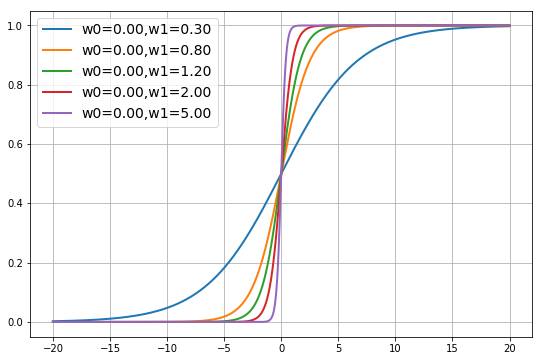

In [22]:
plt.figure(figsize=(9,6))
for w1 in [0.3, 0.8, 1.2, 2, 5]:
    lgt.plot_logistic(0, w1)
plt.grid()
plt.legend(loc=2, fontsize=14)

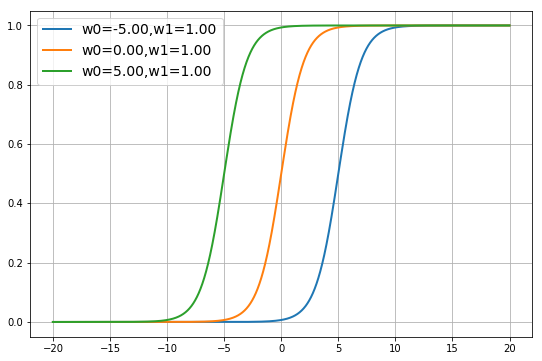

In [21]:
plt.figure(figsize=(9,6))
for w0 in [-5, 0, 5]:
    lgt.plot_logistic(w0, 1)
plt.grid()
plt.legend(loc=2, fontsize=14)

### Looking at the influence of the regularization parameter on predicting coefficients in linear fit of logreg

In [28]:
X, Y = lgt.generate_data_fit_to_log_reg(1)

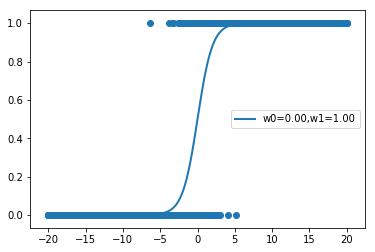

In [32]:
lgt.plot_logistic(0, 1)
plt.scatter(X.tolist(), Y.tolist())

In [210]:
def plot_metrics_for_C():
    f, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
    for C in [0.5, 1, 10, 100, 1000, 100000]:
        d = {}
        for w1 in [math.exp(math.log(2) * i) for i in range(-6,6)]:
            X, Y = lgt.generate_data_fit_to_log_reg(w1)
            clf = LogisticRegression(C=C, tol=0.000001)
            d[w1] = lgt.calculate_outputs_of_logreg(clf, X, Y, w1, n_samples)
        #
        ax[0,0].plot(d.keys(), [d[k].loc['auc', 'means'] for k in d], label=str(C))
        ax[0,0].set_xscale('log')
        ax[0,0].legend()
        #
        ax[0,1].plot(d.keys(), [d[k].loc['mse', 'means'] for k in d], label=str(C))
        ax[0,1].set_xscale('log')
        ax[0,1].legend()
        #
        ax[1,0].plot(d.keys(), [d[k].loc['w0', 'means'] for k in d], label=str(C))
        ax[1,0].plot(d.keys(), [0 for k in d], c='k')
        ax[1,0].set_xscale('log')
        ax[1,0].legend()
        #
        ax[1,1].plot(d.keys(), [d[k].loc['w1', 'means'] for k in d], label=str(C))
        ax[1,1].plot(d.keys(), [k for k in d], c='k')
        ax[1,1].set_xscale('log')
        ax[1,1].legend()

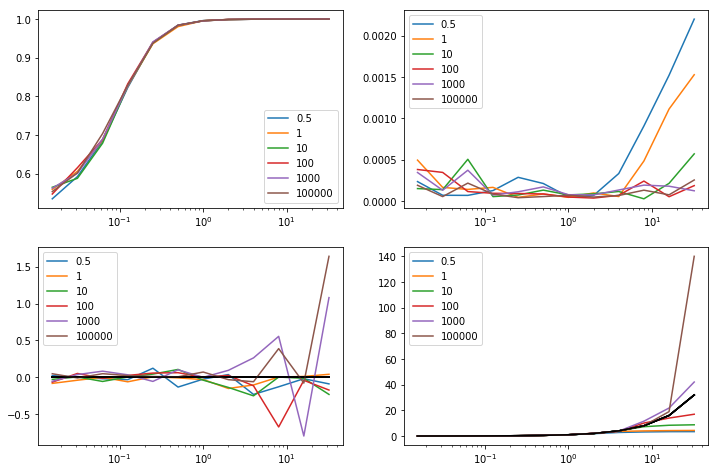

In [211]:
plot_metrics_for_C()

## 2D no correlation